In [83]:
df = pd.read_csv("Mall_Customers.csv")

In [84]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [85]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


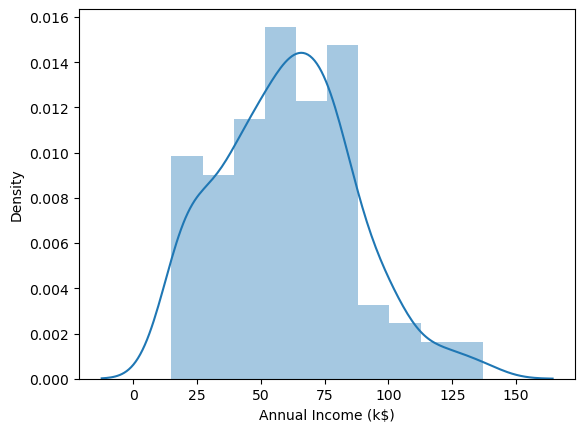

In [86]:
sns.distplot(df['Annual Income (k$)']);

In [87]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

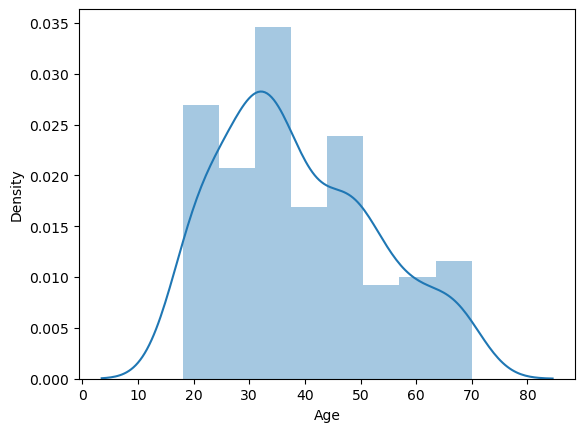

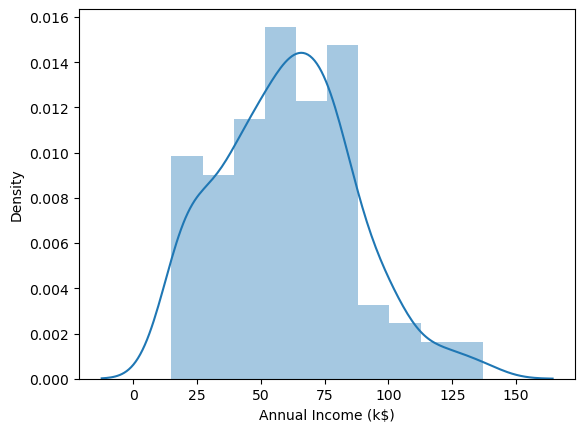

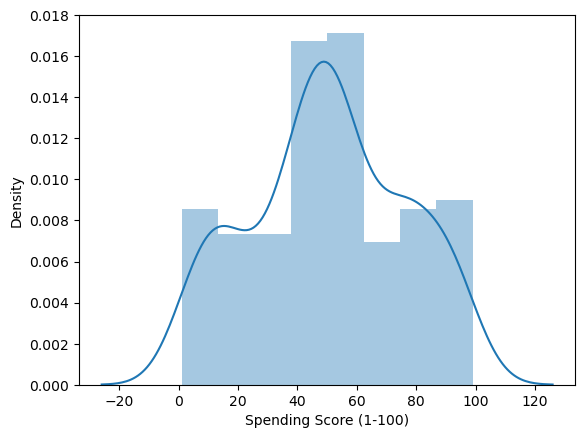

In [88]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    # create a new figure/visual for each column
    plt.figure()
    sns.distplot(df[i])

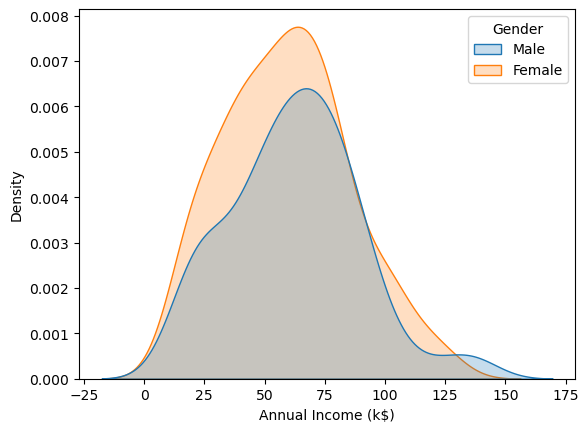

In [89]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

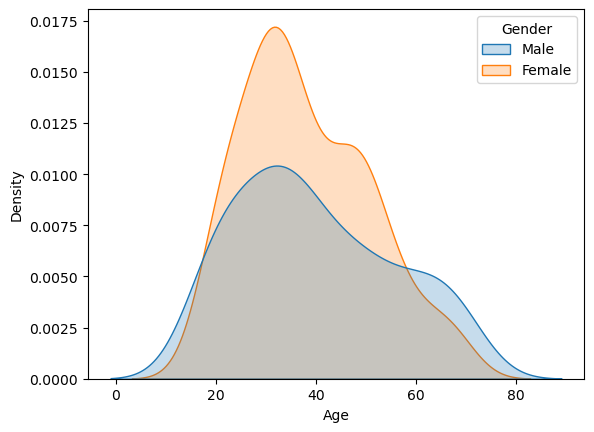

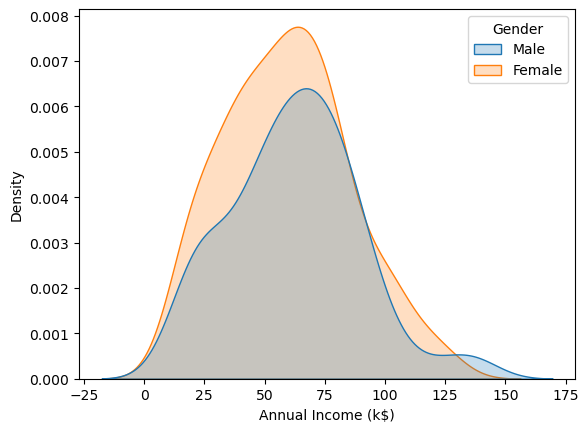

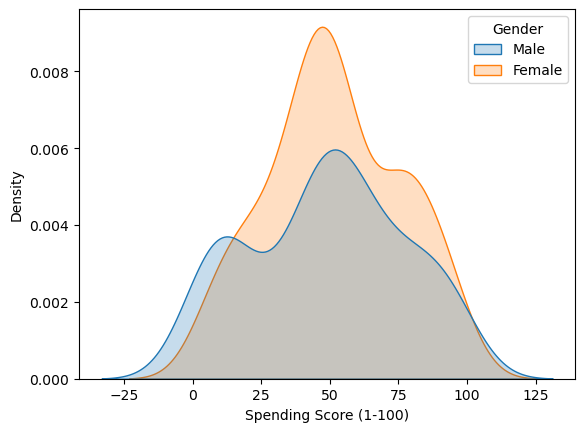

In [90]:
# create kde visual for each specified column
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    # create a new figure/visual for each column
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

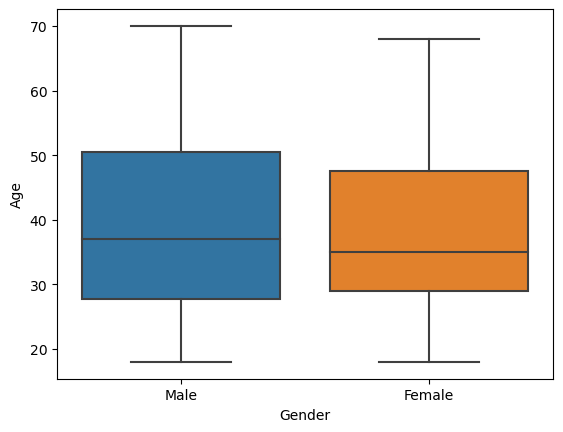

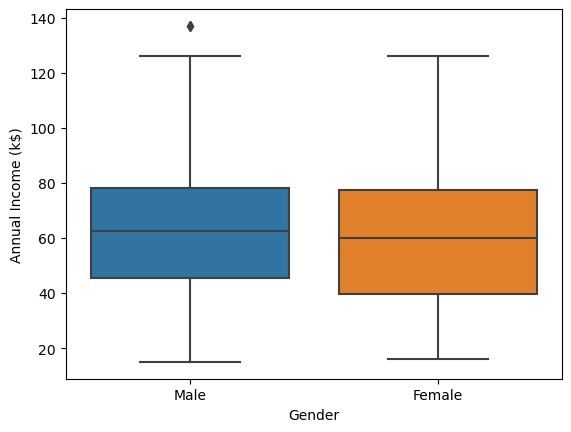

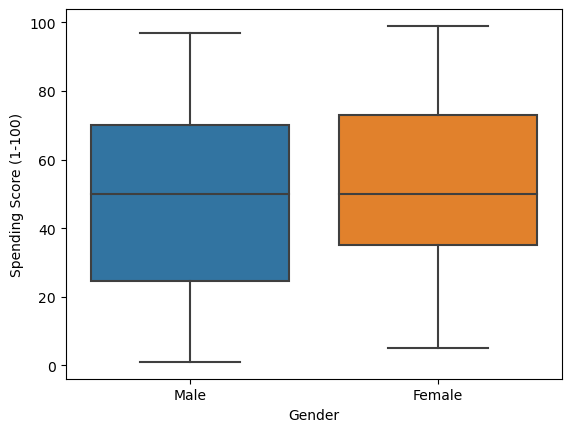

In [91]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    # create a new figure/visual for each column
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [92]:
# get distribution of male and female, normalize=True for percentages
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

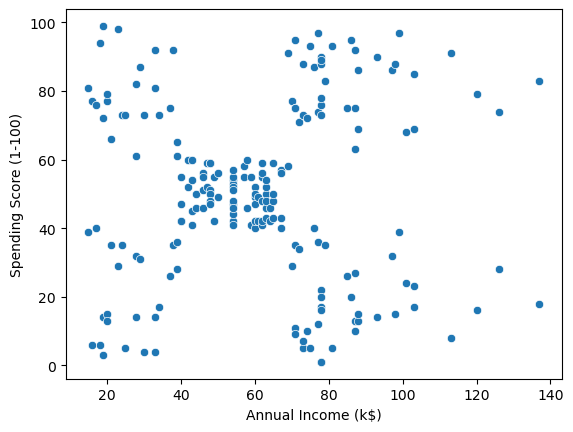

In [93]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

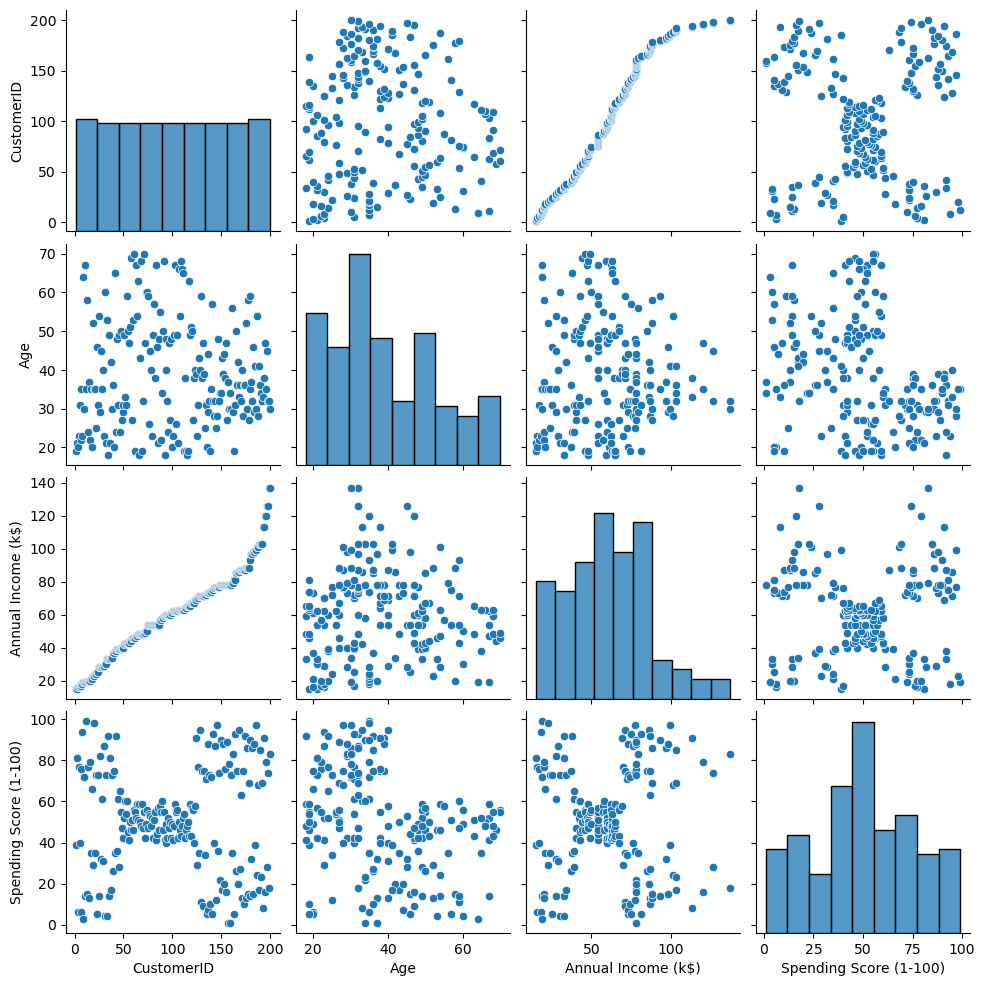

In [94]:
# drop customer id as it does not contribute relevant info
# df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

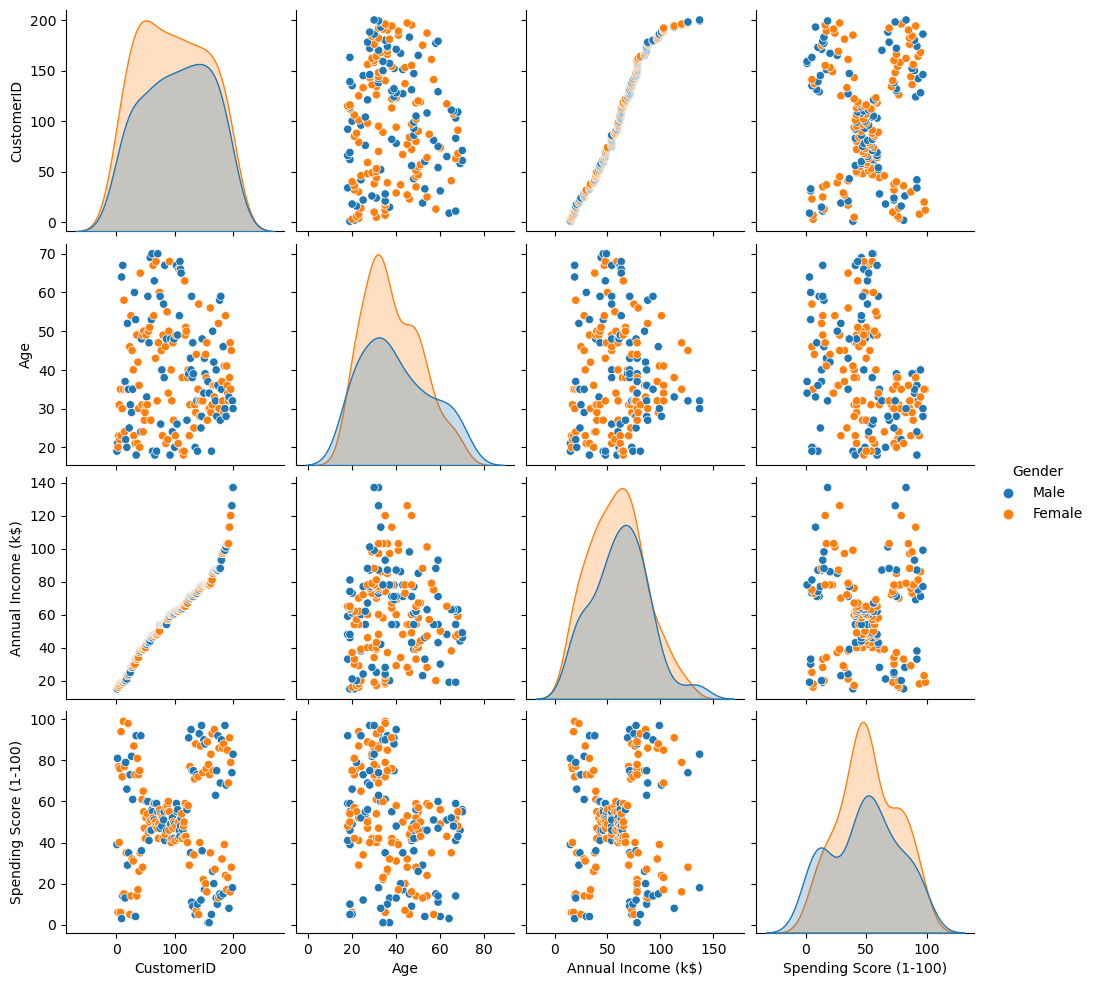

In [95]:
sns.pairplot(data=df,hue='Gender')

In [96]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [97]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

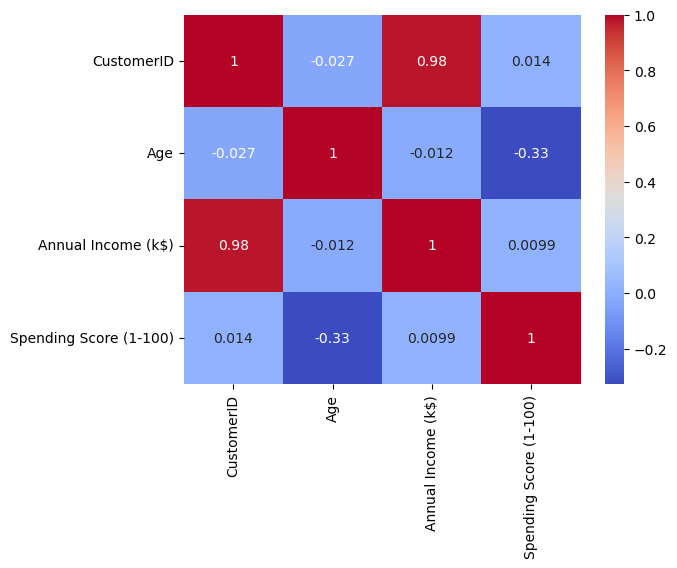

In [98]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Univariate Clustering

In [99]:
# initiate first cluster
clustering1 = KMeans(n_clusters=3)

In [100]:
# fit the cluster to the data
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [101]:
# look at the labels
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [102]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [103]:
# get the number of customers that fall into each cluster
df['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [104]:
clustering1.inertia_

23517.33093093092

In [105]:
inertia_scores=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [106]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3976.3583638583614,
 2822.4996947496957,
 2189.2563714063713,
 1783.8106060606067]

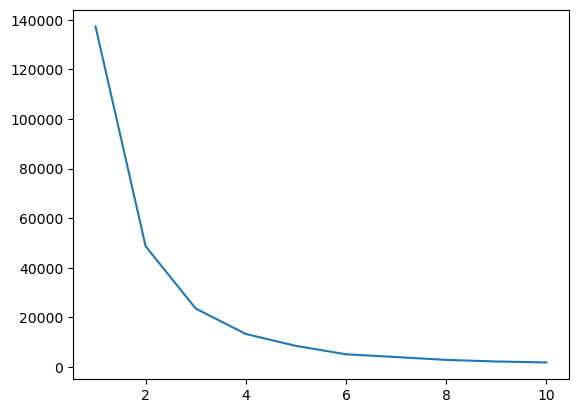

In [107]:
# elbow method: identify when it starts
plt.plot(range(1,11),inertia_scores)

In [108]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


## Bivariate Clustering

In [109]:
clustering2 = KMeans(n_clusters=5)
clustering2 = clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


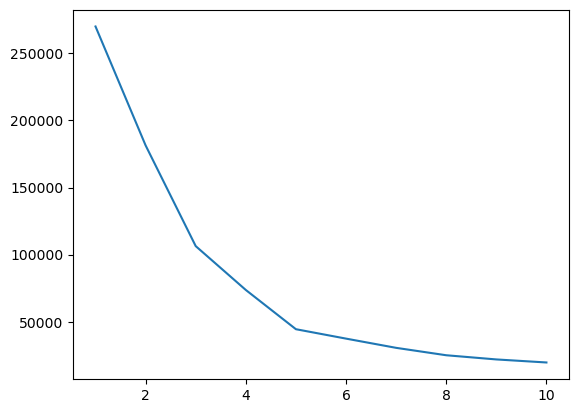

In [110]:
# optimize the cluster, find the elbow, which appears to be at 5
inertia_scores2=[]

for i in range (1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [118]:
# get (x, y) coords of centers for each cluster
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

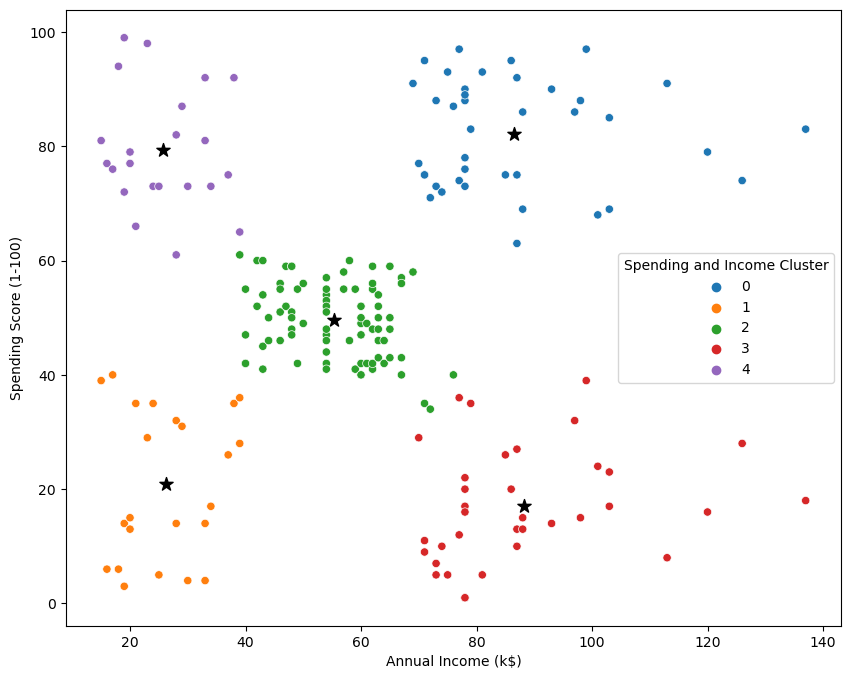

In [143]:
# visualize the bivariate analysis using scatter plot

# make the figure larger
plt.figure(figsize=(10,8))

# add centers of each cluster to the scatter plot, size: 100, color: black, marker: star
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')

# display scatter plot
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster', palette='tab10')

# save figure as png
plt.savefig('clustering_bivariate.png')

In [121]:
# break down by gender, percentage of male/female for each cluster
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [122]:
# display average age of each cluster
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


## Multivariable Cluster

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scale = StandardScaler()

In [126]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


In [132]:
# drop the first column (female encodings) since it is redundant.
# convert male/female to one hot encodings
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,1,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,1,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,1,0


In [130]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [131]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [138]:
# scale the dataframe
dff = scale.fit_transform(dff)

In [139]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5,6
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.129915,-0.727191,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.129915,1.724015,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-1.129915,-0.727191,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-1.129915,1.724015,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-1.129915,-0.727191,-0.886405


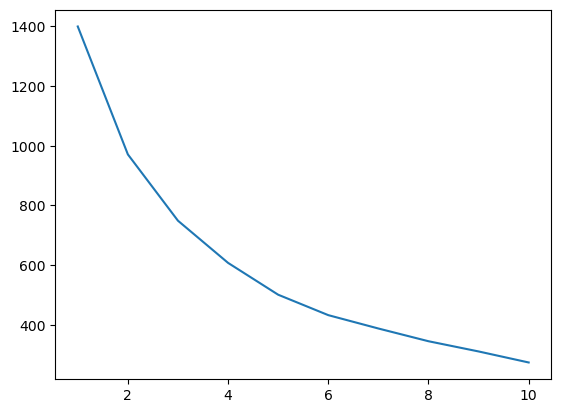

In [140]:
inertia_scores3 = []

for i in range (1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [141]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,2,3
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,2,3


In [142]:
# save clustering as csv file
df.to_csv('Clustering.csv')